In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import math

def plot_scenario_data(df, name):
    df.columns = ['Unnamed: 0', 'Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress', 'state_name','end_state']
    df = df.drop(labels=["Unnamed: 0", "end_state"], axis=1) # 'Heuristic_Stress's

    df_means = df.groupby("state_name").mean() #.aggregate(['mean', 'std'])
    df_var = df.groupby("state_name").var()

    try:
        df_means = df_means.drop(["preflight", "landed", "crashed"]) #"crashed" is not removed for now use it as "max stress"
    except KeyError:
        df_means = df_means.drop(["preflight"]) 
    fig = plt.figure(figsize=(18,9))
    ax = df_means.plot(kind = "bar", figsize=(14,6), title=name, yerr=2*df_var, align='center')
    ax.set(xlabel="Flight state", ylabel="Estimated stress level")
    ax.set_ylim(0, 1)
    #ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    ax.grid(visible=True, axis='y', linestyle='-.')

    plt.show()
    return df



In [31]:
# Extra tool needed to do the box plots
def plot_scenario_data_box(df, name):
    df.columns = ['Unnamed: 0', 'Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress', 'state_name','end_state']
    df = df.drop(labels=["Unnamed: 0", "end_state"], axis=1) # 'Heuristic_Stress's


    labels = ['Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress']
    df = df.groupby("state_name").mean()

    #df = df[df.state_name != "preflight"]
    try:
        df = df.drop(["preflight", "landed", "crashed"]) #"crashed" is not removed for now use it as "max stress"
    except KeyError:
        df = df.drop(["preflight"]) 
    fig = plt.figure(figsize=(18,9))
    #ax = df.plot(figsize=(14,6), title=name)
    ax = plt.gca()
    bplot1 = ax.boxplot(df,
                        #notch=True,  # notch shape
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color)
                        labels=labels
    )
    
    colors = ['pink', 'lightblue', 'lightgreen', 'blue', 'red']

    zipped = zip(bplot1['boxes'], colors)
    for patch, color in zipped:
        patch.set_facecolor(color)

    ax.set(xlabel="Flight state", ylabel="Estimated stress level")
    ax.set_ylim(0, 1)
    #ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    ax.grid(visible=True, axis='y', linestyle='-.')

    plt.show()
    return df




In [44]:

df_scen1 = pd.read_csv("./data/stress_data_scenario_one__.csv") #simple
df_scen2 = pd.read_csv("./data/backup/original/stress_data_scenario_two__.csv") #wind
#df_scen3 = pd.read_csv("./data/stress_data_scenario_three__.csv") #fuel
#df_scen4 = pd.read_csv("./data/stress_data_scenario_four__.csv") #extreme

# TODO: Rename models to correspond with slide naming

In [35]:

def compute_ci(df):
    df.columns = ['Unnamed: 0', 'Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress', 'state_name','end_state']
    df = df.drop(labels=["Unnamed: 0", "end_state"], axis=1) # 'Heuristic_Stress's

    condition_names = ['Heuristic Stress', 'Predictability-Control Stress', 'Value Stress', 'Control Stress', 'Predictability stress']

    for condition in condition_names:
        #print("-------")
        col_stats = df[[condition, "state_name"]].groupby("state_name").agg(['mean', 'count', 'std'])

        try:
            stats = col_stats.drop(["preflight", "landed", "crashed"]) #"crashed" is not removed for now use it as "max stress"
        except KeyError:
            stats = col_stats.drop(["preflight"]) 

        #print(stats)

        ci95_hi = []
        ci95_lo = []

        for i in stats.index:
            #print(i)
            m, c, s = stats.loc[i]
            ci95_hi.append(m + 1.96*s/math.sqrt(c))
            ci95_lo.append(m - 1.96*s/math.sqrt(c))

        stats['ci95_hi'] = ci95_hi
        stats['ci95_lo'] = ci95_lo
        #print(stats)


compute_ci(df_scen1)


<Figure size 1296x648 with 0 Axes>

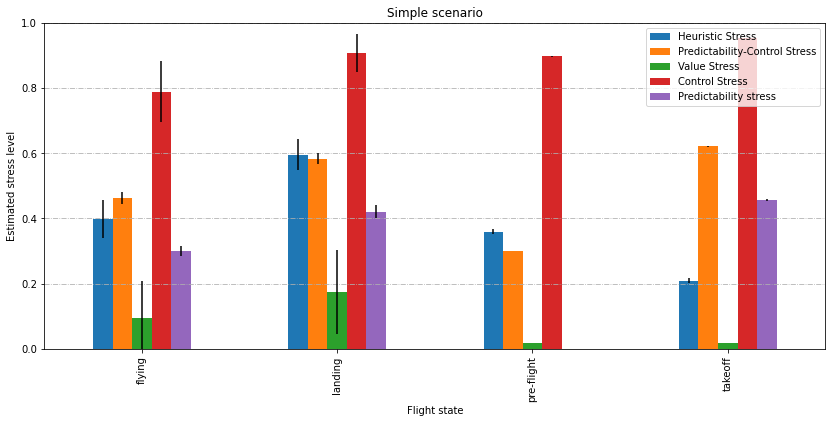

     Heuristic Stress  Predictability-Control Stress  Value Stress  \
0           -1.000000                      -1.000000     -1.000000   
1            0.247307                       0.319367      0.019871   
2            0.242208                       0.633242      0.020021   
3            0.274990                       0.533568      0.019562   
4            0.365783                       0.604901      0.019463   
..                ...                            ...           ...   
786          0.453222                       0.506791      0.941752   
787          0.492417                       0.507166      0.981147   
788          0.599615                       0.499627      0.993492   
789          0.687935                       0.487371      0.997792   
790          0.894112                       0.480026      0.999350   

     Control Stress  Predictability stress  state_name  
0         -1.000000              -1.000000   preflight  
1          0.958100               0.000000  p

In [43]:
df = plot_scenario_data(df_scen1, name="Simple scenario")
#df2 = plot_scenario_data(df_scen1_b)
print(df)

In [25]:
#df = plot_scenario_data(df_scen1_b, name="Simple scenario, test with updated data for blue")
#print(df)
# -> no difference

<Figure size 1296x648 with 0 Axes>

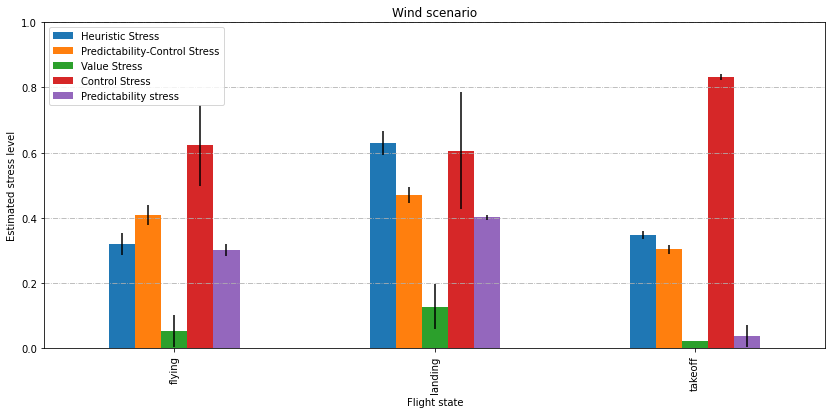

      Heuristic Stress  Predictability-Control Stress  Value Stress  \
0            -1.000000                      -1.000000     -1.000000   
1             0.417585                       0.278494      0.022855   
2             0.045455                       0.585973      0.020813   
3             0.159157                       0.496394      0.020653   
4             0.286690                       0.468326      0.020419   
...                ...                            ...           ...   
1042          0.337105                       0.551700      0.019633   
1043          0.607090                       0.583603      0.036970   
1044          0.538316                       0.495411      0.156779   
1045          0.713163                       0.397935      0.153569   
1046          0.763022                       0.435587      0.160528   

      Control Stress  Predictability stress state_name  
0          -1.000000              -1.000000  preflight  
1           0.835483             

In [45]:
df = plot_scenario_data(df_scen2, name="Wind scenario")
print(df)

<Figure size 1296x648 with 0 Axes>

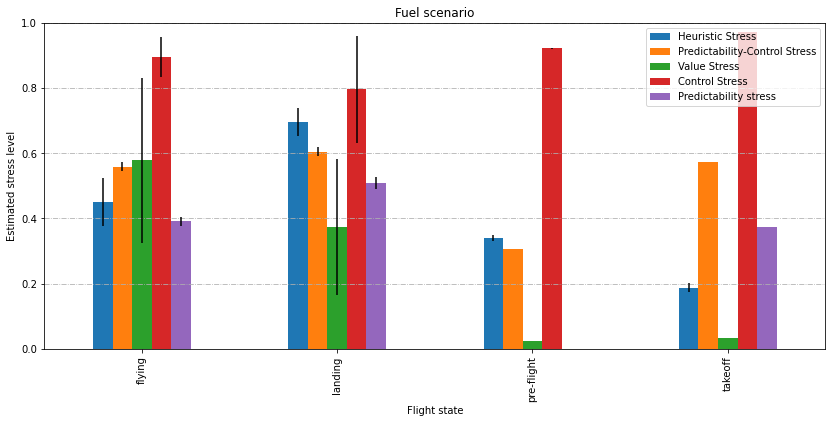

     Heuristic Stress  Predictability-Control Stress  Value Stress  \
0           -1.000000                      -1.000000     -1.000000   
1            0.326882                       0.304139      0.020317   
2            0.165495                       0.597502      0.030820   
3            0.349584                       0.602023      0.055054   
4            0.250466                       0.619829      0.184459   
..                ...                            ...           ...   
345          0.425034                       0.549709      0.928757   
346          0.578123                       0.544748      0.981318   
347          0.691531                       0.566343      0.993208   
348          0.693806                       0.568957      0.997655   
349          0.917698                       0.569859      0.999350   

     Control Stress  Predictability stress  state_name  
0         -1.000000              -1.000000   preflight  
1          0.912417               0.000000  p

In [27]:
df = plot_scenario_data(df_scen3, name="Fuel scenario")
print(df)

<Figure size 1296x648 with 0 Axes>

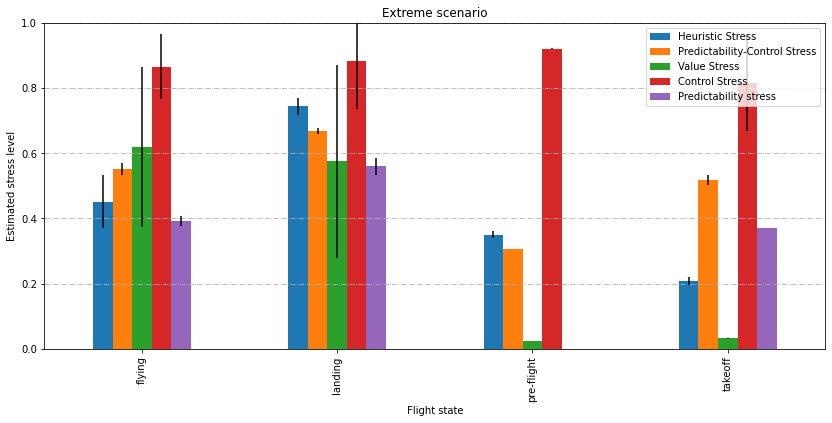

     Heuristic Stress  Predictability-Control Stress  Value Stress  \
0           -1.000000                      -1.000000     -1.000000   
1            0.314015                       0.304098      0.022659   
2            0.169477                       0.537138      0.035165   
3            0.206007                       0.531077      0.053608   
4            0.222366                       0.547457      0.129613   
..                ...                            ...           ...   
349          0.288226                       0.575404      0.120862   
350          0.394911                       0.571757      0.196597   
351          0.318910                       0.490684      0.148129   
352          0.641871                       0.629801      0.195696   
353          0.666884                       0.704250      0.191080   

     Control Stress  Predictability stress  state_name  
0         -1.000000              -1.000000   preflight  
1          0.912293               0.000000  p

In [28]:
df = plot_scenario_data(df_scen4, name="Extreme scenario")
print(df)